In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(xtrain,ytrain), (xtest,ytest) = keras.datasets.mnist.load_data()

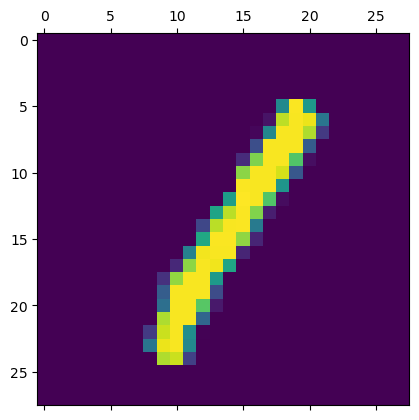

In [3]:
plt.matshow(xtrain[23])

In [4]:
xtrain = xtrain/255
xtest=xtest/255

xtrain_flattened = xtrain.reshape(len(xtrain),28*28)
xtest_flattened = xtest.reshape(len(xtest),28*28)

Flattened the 28x28 array and scaled down to 0-1 range

In [10]:
# xtrain_flattened[23]

First Model. no hidden layer, 784 inputs connecting to 10 outputs each one for each digit

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(xtrain_flattened,ytrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4649 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9258


In [7]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9253


[0.2677266299724579, 0.9253000020980835]

Used one hidden layer with RELU activation and 100 neurons. improved accuracy from 0.92 to 0.9915 !!

In [16]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(xtrain_flattened,ytrain,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1943 - accuracy: 0.9422
Epoch 2/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0821 - accuracy: 0.9742
Epoch 3/8
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0554 - accuracy: 0.9825
Epoch 4/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0414 - accuracy: 0.9863
Epoch 5/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0326 - accuracy: 0.9892
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 7/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0222 - accuracy: 0.9928
Epoch 8/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0201 - accuracy: 0.9937


Tried different optimizers (8 epochs) -
sgd(stochastic gradient descent) - 0.9458 || 
rmsprop - 0.9875 || 
adadelta - 0.7019 || 
adagrad - 0.9008 || 
adamax - 0.9751 || 
**adam - 0.9915**

Used another hidden layer. now with 2 layers of 400 and 100 neurons each using 'relu'. improved accuracy from 0.9915 to 0.9937 . 

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,),activation='relu'),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )
model.fit(xtrain_flattened,ytrain,epochs=8)

In [18]:
model.evaluate(xtest_flattened,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0979 - accuracy: 0.9742


[0.09789453446865082, 0.9742000102996826]